## Introduction:
Fandango is an online movie rating aggregator. In October 2015, d data journalist named Walt Hickey foung strong evidence that the movie rating system was biased. Here is the link to hist article:
Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars. Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that
- The actual rating was almost always rounded up to the nearest half-star.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star.


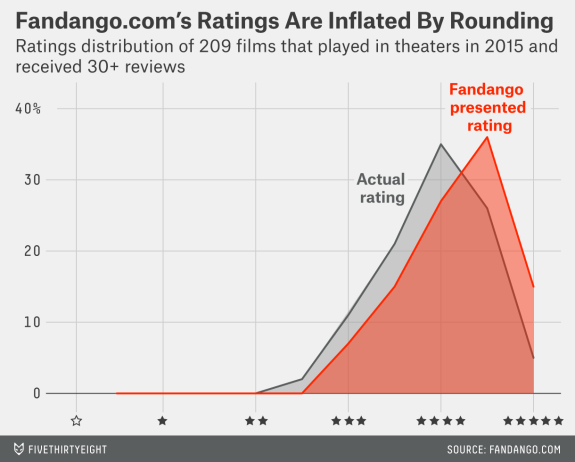
Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. 

## Goal:
In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis

### Approach
To see whether there has been any change in Fandango's rating system after Hickey's analysis, we will compare the system's characterstics previous and after the analysis, as, fortunately, we have ready made data for both these periods of time 


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.options.display.max_columns = 100 # Full view of Columns

## Loading Datasets
- before : data before the analysis
- after : data after the analysis

In [3]:
before = pd.read_csv('fandango_score_comparison.csv')
before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
after = pd.read_csv('movie_ratings_16_17.csv')
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [5]:
before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [6]:
after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [7]:
bdata = before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 
                'Fandango_votes', 'Fandango_Difference']]

In [8]:
adata = after[['movie', 'year', 'fandango']]

#### Defining the population of interest for our project's goal.

As we are working with the samples, the two samples should represent the population we're trying to describe. Much information is given in the ReadMe files of both datasets as well as the Hickey's article
- ReadMe: https://github.com/fivethirtyeight/data/blob/master/fandango/README.md
-  ReadMe:https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md
- Article: https://fivethirtyeight.com/features/fandango-movies-ratings/


We found out that for each dataset different sampling criteria were used. For an instance, the dataset of movies prior to 2015 have only the movies which have at least 30 reviews and a variety of ratings. Whereas with the other dataset, the case has been quite different.

So the sampling process was not the same for the datasets.

**At this point, we have at least two alternatives:**
- either we collect new data, 
- or we change the goal of our analysis by placing some limitations on it.

Tweaking our goal seems a much faster choice compared to collecting new data. Also, it's quasi-impossible to collect a new sample previous to Hickey's analysis at this moment in time.

**Change slightly the current goal of our analysis such that:**

- The population of interest changes and the samples we currently work with become representative.
- The new goal is still a fairly good proxy for our initial goal, which was to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

So the new goal is that We'll determine whether there are any changes in Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

This would be a fairly good proxy for the Fandango's rating system after Hickey's analysis.

With the new goal, we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

**Checking Sample Representativity:**
One way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.




In [9]:
adata.sample(10, random_state=1)


,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As of the time of doing this analysis, 01-06-2021, we could find following number of ratings:

|Movie Name| Number of Ratings as of today|
|:---------|:--------|
|Mechanic: Resurrection| 25,000+|	
|Warcraft| 25,000+|
|Max Steel| 5,000+|
|Me Before You| 25,000+|
|Fantastic Beasts and Where to Find Them| 50,000+|
|Cell| 2,500+|
|Genius| 2,500+|
|Sully| 25,000+|
|A Hologram for the King| 10,000+|
|Captain America: Civil War| 100,000+|

In [10]:
# Let's recheck if there are 30+ votes for each movies in the data of 2015 movies
bdata[bdata['Fandango_votes'] < 30].shape[0]

0

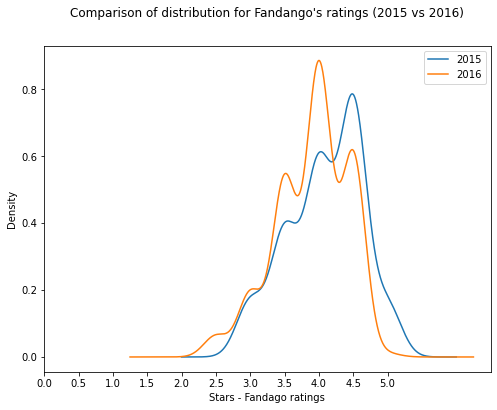

In [11]:
bdata['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,6))
adata['fandango'].plot.kde(label = '2016', legend = True)
plt.xlabel('Stars - Fandago ratings')
plt.legend()
plt.title('Comparison of distribution for Fandango\'s ratings (2015 vs 2016)',
          y = 1.07) # the `y` parameter pads the title upward
plt.xticks(np.arange(0,5.1,.5))
plt.show()

**Observations:**

- Both distributions are strongly left skewed.
- The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.
- The slight left shift of the 2016 distribution suggests that there was a difference indeed between Fandango's ratings for popular movies for 2015 and 2016. This seem to indicate that Fandango did in fact correct their algorithm.



### Examining the frequency distribution tables of the two distributions

In [12]:
rating2015 = bdata['Fandango_Stars'].value_counts(normalize=True)*100
rating2016 = adata['fandango'].value_counts(normalize=True)*100
comparison = pd.concat([rating2015, rating2016], axis=1)
comparison.rename(columns = {'Fandango_Stars': 'Ratings in 2015',
                             'fandango': 'Ratings in 2016'}, 
                 inplace=True)
comparison['Difference'] = comparison['Ratings in 2016'] - comparison['Ratings in 2015']
comparison

,Ratings in 2015,Ratings in 2016,Difference
2.5,NaN,2.803738,NaN
3.0,8.219178,8.411215,0.192037
3.5,18.493151,23.364486,4.871335
4.0,28.082192,38.317757,10.235565
4.5,37.671233,26.635514,-11.035719
5.0,7.534247,0.467290,-7.066957


**Observations:**

- In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015
- In contrast, movies with less higher rankings (4.0 and 3.5) significantly flourished.


## Determining the Direction of the Change
We confirmed with the table before that there is indeed a clear difference between the two distributions. However, the direction of the difference is not as clear as it was on the kernel density plots.


In [13]:
mean_2015 = bdata['Fandango_Stars'].mean()
mean_2016 = adata['fandango'].mean()

median_2015 = bdata['Fandango_Stars'].median()
median_2016 = adata['fandango'].median()

mode_2015 = bdata['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = adata['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.089041,3.89486
median,4.000000,4.00000
mode,4.500000,4.00000


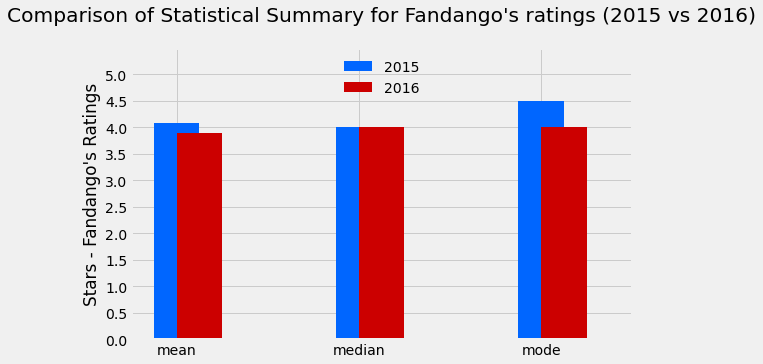

In [14]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparison of Statistical Summary for Fandango\'s ratings (2015 vs 2016)', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars - Fandango\'s Ratings')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

We see that both the mean and mode dropped in 2016, indicating that Fandango did something to fix their algorithm. However, the median did not change.

**Conclusion:**

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are that it was caused by Fandango fixing the biased rating system after Hickey's analysis.

